In [4]:
import numpy as np
import pandas as pd
import datetime
import time
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import gc
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [124]:
pwd

'C:\\Users\\Petro Ck\\OneDrive\\Task 2\\_petro'

In [281]:
taxi = pd.read_table("C:/Users/Petro Ck/OneDrive/Task 2/data/train_raw_and_new_features.csv", sep = ",")

In [125]:
taxi.columns

Index(['INDEX', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_duration',
       'average_speed', 'night_trip', 'rush_hour'],
      dtype='object')

In [126]:
taxi["trip_duration"] = taxi["trip_duration"]/60

In [128]:
gc.collect()

540

In [282]:
taxi.describe()

,INDEX,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,average_speed,night_trip,rush_hour
count,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,...,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000,11082242.000
mean,5567917.248,1.530,1.658,3.017,-73.060,40.248,1.040,-73.199,40.325,1.348,...,0.340,0.498,1.836,0.335,0.300,16.621,885.151,11.464,0.343,0.167
std,3214889.718,0.499,1.303,3.670,8.166,4.499,0.388,7.527,4.146,0.493,...,0.486,0.043,2.653,1.665,0.013,58.450,698.632,6.163,0.475,0.373
min,0.000,1.000,0.000,0.000,-118.186,0.000,1.000,-118.186,0.000,1.000,...,-41.230,-2.700,-67.700,-12.500,-0.300,-450.800,1.000,0.000,0.000,0.000
25%,2783378.250,1.000,1.000,1.000,-73.992,40.737,1.000,-73.991,40.735,1.000,...,0.000,0.500,0.000,0.000,0.300,8.800,412.000,7.356,0.000,0.000
50%,5567696.500,2.000,1.000,1.710,-73.981,40.754,1.000,-73.979,40.754,1.000,...,0.000,0.500,1.350,0.000,0.300,12.300,693.000,10.206,0.000,0.000
75%,8352607.750,2.000,2.000,3.220,-73.966,40.768,1.000,-73.962,40.770,2.000,...,0.500,0.500,2.460,0.000,0.300,18.360,1137.000,13.978,1.000,0.000
max,11135469.000,2.000,9.000,72.140,0.000,64.096,99.000,106.247,60.041,5.000,...,597.920,60.350,854.850,905.540,0.940,187442.260,5400.000,50.000,1.000,1.000


## There are 11082242 in the raw dataset.

In [130]:
all_vars = set(i for i in taxi.columns)
list_var_test = list(taxi_test.columns)
list_var_test.append( "total_amount")
var_test = set(i for i in list_var_test)
# Give variables that are in train but not in test #
var_missing = all_vars - var_test
var_missing
var_missing = list(var_missing)
taxi.drop(var_missing, axis = 1, inplace= True)

In [131]:
taxi.drop("INDEX", axis = 1, inplace= True)

In [132]:
taxi["tpep_pickup_datetime"] = pd.to_datetime(taxi["tpep_pickup_datetime"])
taxi["tpep_dropoff_datetime"] = pd.to_datetime(taxi["tpep_dropoff_datetime"])

In [133]:
taxi = taxi[(taxi.RatecodeID !=6) & (taxi.RatecodeID !=99)] # Since they are not in test set

Adjust coordinates to test set:

In [136]:
taxi = taxi[(taxi["pickup_latitude"] > 35) 
    & (taxi["pickup_latitude"] < 45)
    & (taxi["pickup_longitude"] > -80) 
    & (taxi["pickup_longitude"] < -70)
    & (taxi["dropoff_latitude"] > 35) 
    & (taxi["dropoff_latitude"] < 45)
    & (taxi["dropoff_longitude"] > -80) 
    & (taxi["dropoff_longitude"] < -70)]

In [152]:
taxi = taxi[(taxi["payment_type"] != 5) ]

In [137]:
rc1 = taxi[taxi["RatecodeID"]==1]
rc2 = taxi[taxi["RatecodeID"]==2]
rc3 = taxi[taxi["RatecodeID"]==3]
rc4 = taxi[taxi["RatecodeID"]==4]
rc5 = taxi[taxi["RatecodeID"]==5]

In [160]:
rc1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_duration',
       'average_speed', 'night_trip', 'rush_hour'],
      dtype='object')

In [162]:
taxi.index

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            11082232, 11082233, 11082234, 11082235, 11082236, 11082237,
            11082238, 11082239, 11082240, 11082241],
           dtype='int64', length=10940301)

In [138]:
gc.collect()

626

# RateCodeID 1

In [139]:
rc1.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,trip_duration,average_speed,night_trip,rush_hour
count,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000,10648073.000
mean,1.531,1.658,2.655,-73.976,40.752,1.000,-73.974,40.753,1.348,0.209,0.300,15.195,13.960,11.167,0.345,0.166
std,0.499,1.305,2.788,0.035,0.027,0.000,0.033,0.032,0.492,1.221,0.012,58.368,10.136,5.679,0.475,0.372
min,1.000,0.000,0.000,-79.289,35.263,1.000,-79.419,35.739,1.000,-5.540,-0.300,-53.980,0.017,0.000,0.000,0.000
25%,1.000,1.000,1.000,-73.992,40.738,1.000,-73.991,40.737,1.000,0.000,0.300,8.760,6.800,7.312,0.000,0.000
50%,2.000,1.000,1.700,-73.982,40.755,1.000,-73.980,40.755,1.000,0.000,0.300,12.000,11.317,10.082,0.000,0.000
75%,2.000,2.000,3.060,-73.968,40.769,1.000,-73.963,40.770,2.000,0.000,0.300,17.760,18.250,13.649,1.000,0.000
max,2.000,9.000,65.400,-70.268,44.746,1.000,-70.169,44.955,5.000,585.580,0.300,187442.260,90.000,50.000,1.000,1.000


This is the most impactful RateCodeID as it has the most observations

## Variable "trip_distance"

In [99]:
rc1["trip_distance"].describe()

count   10778858.000
mean           2.653
std            2.787
min            0.000
25%            1.000
50%            1.700
75%            3.060
max           65.400
Name: trip_distance, dtype: float64

In [140]:
rc1["trip_distance"].quantile(0.999)

20.61

In [141]:
rc1[rc1.trip_distance >= rc1["trip_distance"].quantile(0.999)].count() #10795. Cut these out

VendorID                 10666
tpep_pickup_datetime     10666
tpep_dropoff_datetime    10666
passenger_count          10666
trip_distance            10666
pickup_longitude         10666
pickup_latitude          10666
RatecodeID               10666
store_and_fwd_flag       10666
dropoff_longitude        10666
dropoff_latitude         10666
payment_type             10666
tolls_amount             10666
improvement_surcharge    10666
total_amount             10666
trip_duration            10666
average_speed            10666
night_trip               10666
rush_hour                10666
dtype: int64

In [142]:
rc1 = rc1[rc1.trip_distance <= rc1["trip_distance"].quantile(0.999)]

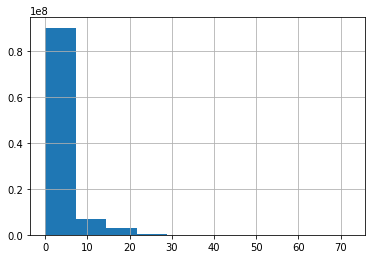

In [143]:
select = np.random.randint(0, taxi.shape[0], 100000000)
test_data = taxi["trip_distance"].iloc[select]
test_data.hist()

Since the dataset was too big I just ploted some randomly chosen variables. We see here that we have most obeservations are below 5 miles which makes sense for a ride within New York. <br> Let's have a short look at the rides below 5 miles:

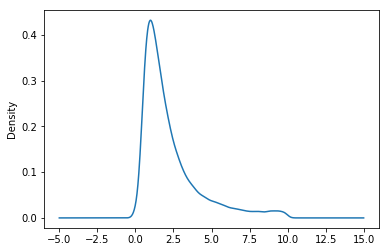

In [145]:
short_rides = rc1["trip_distance"][rc1["trip_distance"] < 10]
select = np.random.randint(0, short_rides.shape[0], 100000)
test_data = short_rides.iloc[select]
test_data.plot.density()

In [147]:
rc1[rc1.trip_distance <0].count() # We're good

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
average_speed            0
night_trip               0
rush_hour                0
dtype: int64

###### Remove negative trip distances:

In [151]:
rc1[rc1.trip_distance <0].count() # We're good

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
average_speed            0
night_trip               0
rush_hour                0
dtype: int64

## Variable tolls amount

In [157]:
rc1["tolls_amount"].quantile(0.9999)

12.5

In [158]:
rc1 = rc1[rc1.tolls_amount < 12]

In [164]:
rc1.count()

VendorID                 10636005
tpep_pickup_datetime     10636005
tpep_dropoff_datetime    10636005
passenger_count          10636005
trip_distance            10636005
pickup_longitude         10636005
pickup_latitude          10636005
RatecodeID               10636005
store_and_fwd_flag       10636005
dropoff_longitude        10636005
dropoff_latitude         10636005
payment_type             10636005
tolls_amount             10636005
improvement_surcharge    10636005
total_amount             10636005
trip_duration            10636005
average_speed            10636005
night_trip               10636005
rush_hour                10636005
dtype: int64

In [283]:
(11082242 - 10636005)/11082242

0.04026594979607917

## Variable improvement_surcharge ##

In [167]:
rc1[rc1.improvement_surcharge < 0].count()

VendorID                 3826
tpep_pickup_datetime     3826
tpep_dropoff_datetime    3826
passenger_count          3826
trip_distance            3826
pickup_longitude         3826
pickup_latitude          3826
RatecodeID               3826
store_and_fwd_flag       3826
dropoff_longitude        3826
dropoff_latitude         3826
payment_type             3826
tolls_amount             3826
improvement_surcharge    3826
total_amount             3826
trip_duration            3826
average_speed            3826
night_trip               3826
rush_hour                3826
dtype: int64

In [168]:
rc1 = rc1[rc1.improvement_surcharge > 0]

In [170]:
rc1["improvement_surcharge"].quantile(np.linspace(0.1,1,20))

0.100   0.300
0.147   0.300
0.195   0.300
0.242   0.300
0.289   0.300
0.337   0.300
0.384   0.300
0.432   0.300
0.479   0.300
0.526   0.300
0.574   0.300
0.621   0.300
0.668   0.300
0.716   0.300
0.763   0.300
0.811   0.300
0.858   0.300
0.905   0.300
0.953   0.300
1.000   0.300
Name: improvement_surcharge, dtype: float64

# Variable total_amount ##

In [171]:
rc1["total_amount"].describe()

count   10631513.000
mean          15.132
std           58.368
min            0.000
25%            8.760
50%           12.000
75%           17.760
max       187442.260
Name: total_amount, dtype: float64

In [172]:
rc1["total_amount"].quantile(np.linspace(0.1,1,20))

0.100        6.800
0.147        7.300
0.195        8.020
0.242        8.750
0.289        9.300
0.337        9.800
0.384       10.300
0.432       11.000
0.479       11.760
0.526       12.360
0.574       13.300
0.621       14.160
0.668       15.300
0.716       16.560
0.763       18.300
0.811       20.300
0.858       23.160
0.905       27.950
0.953       38.300
1.000   187442.260
Name: total_amount, dtype: float64

In [174]:
rc1["total_amount"].quantile(0.9995)

71.76

In [175]:
rc1 = rc1[rc1.total_amount < 70]

In [176]:
rc1.count()

VendorID                 10624233
tpep_pickup_datetime     10624233
tpep_dropoff_datetime    10624233
passenger_count          10624233
trip_distance            10624233
pickup_longitude         10624233
pickup_latitude          10624233
RatecodeID               10624233
store_and_fwd_flag       10624233
dropoff_longitude        10624233
dropoff_latitude         10624233
payment_type             10624233
tolls_amount             10624233
improvement_surcharge    10624233
total_amount             10624233
trip_duration            10624233
average_speed            10624233
night_trip               10624233
rush_hour                10624233
dtype: int64

In [284]:
(11082242-10624233)/11082242 #passt

0.04132818972911799

# RateCodeID 2

In [191]:
rc2.describe() #240401 observations

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,trip_duration,average_speed,night_trip,rush_hour
count,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000,240401.000
mean,1.560,1.748,17.324,-73.864,40.690,2.000,-73.909,40.716,1.329,4.345,0.299,65.142,47.788,23.386,0.270,0.225
std,0.496,1.326,4.434,0.096,0.055,0.000,0.096,0.057,0.502,4.050,0.020,46.058,18.770,9.412,0.444,0.418
min,1.000,1.000,0.000,-78.621,38.041,2.000,-78.621,38.041,1.000,-5.540,-0.300,-75.410,0.017,0.000,0.000,0.000
25%,1.000,1.000,16.900,-73.977,40.645,2.000,-73.985,40.647,1.000,5.540,0.300,58.340,35.083,16.985,0.000,0.000
50%,2.000,1.000,17.880,-73.790,40.648,2.000,-73.970,40.737,1.000,5.540,0.300,64.800,47.533,21.939,0.000,0.000
75%,2.000,2.000,19.100,-73.783,40.750,2.000,-73.789,40.760,2.000,5.540,0.300,70.010,60.933,29.289,1.000,0.000
max,2.000,6.000,67.870,-73.213,41.047,2.000,-73.126,41.561,4.000,905.540,0.300,8454.240,90.000,50.000,1.000,1.000


## Trip distance

In [192]:
rc2["trip_distance"].describe()

count   240401.000
mean        17.324
std          4.434
min          0.000
25%         16.900
50%         17.880
75%         19.100
max         67.870
Name: trip_distance, dtype: float64

I will not change nything here

## Tolls amount

In [193]:
rc2["tolls_amount"].describe()

count   240401.000
mean         4.345
std          4.050
min         -5.540
25%          5.540
50%          5.540
75%          5.540
max        905.540
Name: tolls_amount, dtype: float64

In [194]:
rc2["tolls_amount"].quantile(np.linspace(0.1, 0.999, 10))

0.100    0.000
0.200    0.000
0.300    5.540
0.400    5.540
0.500    5.540
0.599    5.540
0.699    5.540
0.799    5.540
0.899    5.540
0.999   11.080
Name: tolls_amount, dtype: float64

Remove odd values:

In [197]:
rc2 = rc2[(rc2.tolls_amount>0) & (rc2.tolls_amount<10)]

In [198]:
rc2.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,trip_duration,average_speed,night_trip,rush_hour
count,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000,185668.000
mean,1.566,1.768,17.727,-73.860,40.689,2.000,-73.909,40.719,1.312,5.546,0.300,66.465,48.485,23.839,0.250,0.227
std,0.496,1.332,3.825,0.094,0.055,0.000,0.094,0.058,0.479,0.148,0.001,20.434,17.750,9.059,0.433,0.419
min,1.000,1.000,0.000,-74.613,40.583,2.000,-74.691,40.474,1.000,0.010,0.000,0.000,0.017,0.000,0.000,0.000
25%,1.000,1.000,17.020,-73.975,40.645,2.000,-73.985,40.647,1.000,5.540,0.300,58.340,35.850,17.448,0.000,0.000
50%,2.000,1.000,17.900,-73.790,40.648,2.000,-73.970,40.745,1.000,5.540,0.300,68.340,47.967,22.228,0.000,0.000
75%,2.000,2.000,19.200,-73.782,40.750,2.000,-73.790,40.760,2.000,5.540,0.300,70.010,60.900,29.460,0.000,0.000
max,2.000,6.000,54.500,-73.213,41.019,2.000,-73.213,41.561,4.000,9.840,0.300,8454.240,90.000,49.995,1.000,1.000


In [287]:
(11082242-185668)/11082242

0.9832463503323605

## Improvement surcharge

In [201]:
rc2["improvement_surcharge"].describe()

count   185668.000
mean         0.300
std          0.001
min          0.000
25%          0.300
50%          0.300
75%          0.300
max          0.300
Name: improvement_surcharge, dtype: float64

In [202]:
rc2[rc2.improvement_surcharge < 0].count() # passt

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
average_speed            0
night_trip               0
rush_hour                0
dtype: int64

## Total amount

In [203]:
rc2["total_amount"].describe()

count   185668.000
mean        66.465
std         20.434
min          0.000
25%         58.340
50%         68.340
75%         70.010
max       8454.240
Name: total_amount, dtype: float64

We see that 25% Quantile is 58$, a lot of expensive trips. Remeve just the crazy outliers:

In [209]:
rc2["total_amount"].quantile(0.999997)

3844.5554240312026

In [214]:
rc2 = rc2[rc2.total_amount < 100]

In [215]:
rc2.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge,total_amount,trip_duration,average_speed,night_trip,rush_hour
count,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000,185606.000
mean,1.566,1.768,17.727,-73.860,40.689,2.000,-73.909,40.719,1.312,5.546,0.300,66.402,48.482,23.840,0.250,0.227
std,0.496,1.332,3.824,0.094,0.055,0.000,0.094,0.058,0.479,0.148,0.001,6.132,17.748,9.059,0.433,0.419
min,1.000,1.000,0.000,-74.613,40.583,2.000,-74.691,40.474,1.000,0.010,0.000,0.000,0.017,0.000,0.000,0.000
25%,1.000,1.000,17.020,-73.975,40.645,2.000,-73.985,40.647,1.000,5.540,0.300,58.340,35.850,17.450,0.000,0.000
50%,2.000,1.000,17.900,-73.790,40.648,2.000,-73.970,40.745,1.000,5.540,0.300,68.340,47.967,22.229,0.000,0.000
75%,2.000,2.000,19.200,-73.782,40.750,2.000,-73.790,40.760,2.000,5.540,0.300,70.010,60.900,29.461,0.000,0.000
max,2.000,6.000,54.500,-73.213,41.019,2.000,-73.213,41.561,4.000,9.840,0.300,98.340,90.000,49.995,1.000,1.000


# RateCodeID 3

## Trip Distance

In [216]:
rc3.trip_distance.describe()

count   20862.000
mean       16.449
std         5.895
min         0.000
25%        15.330
50%        17.300
75%        18.500
max        59.000
Name: trip_distance, dtype: float64

## Improvement surcharge

In [218]:
rc3["improvement_surcharge"].describe()

count   20862.000
mean        0.299
std         0.026
min        -0.300
25%         0.300
50%         0.300
75%         0.300
max         0.300
Name: improvement_surcharge, dtype: float64

In [219]:
rc3 = rc3[rc3.improvement_surcharge > 0]

In [220]:
rc3["improvement_surcharge"].describe()

count   20820.000
mean        0.300
std         0.000
min         0.300
25%         0.300
50%         0.300
75%         0.300
max         0.300
Name: improvement_surcharge, dtype: float64

# Tolls amount

In [221]:
rc3.tolls_amount.describe()

count   20820.000
mean       13.227
std         7.456
min         0.000
25%        10.500
50%        12.500
75%        16.800
max       712.510
Name: tolls_amount, dtype: float64

In [224]:
rc3["tolls_amount"].quantile(0.999)

37.15602000000021

In [225]:
rc3 = rc3[rc3.tolls_amount<35]

In [226]:
rc3.tolls_amount.describe()

count   20792.000
mean       13.148
std         5.473
min         0.000
25%        10.500
50%        12.500
75%        16.800
max        34.000
Name: tolls_amount, dtype: float64

## Total amount

In [227]:
rc3.total_amount.describe()

count   20792.000
mean       90.284
std        24.039
min         0.000
25%        82.800
50%        92.800
75%       102.880
max       238.800
Name: total_amount, dtype: float64

These trips seem quite expensive (75%-Quantile) with a max of 238. Keep it as it is.

# RateCodeID 4

In [228]:
rc4.trip_distance.describe()

count   5262.000
mean      17.332
std        9.409
min        0.000
25%       10.200
50%       16.700
75%       23.200
max       72.140
Name: trip_distance, dtype: float64

## Improvement surcharge

Keep it

In [229]:
rc4.improvement_surcharge.describe()

count   5262.000
mean       0.300
std        0.009
min       -0.300
25%        0.300
50%        0.300
75%        0.300
max        0.300
Name: improvement_surcharge, dtype: float64

In [230]:
rc4 = rc4[rc4.improvement_surcharge>0]
rc4.improvement_surcharge.describe()

count   5260.000
mean       0.300
std        0.000
min        0.300
25%        0.300
50%        0.300
75%        0.300
max        0.300
Name: improvement_surcharge, dtype: float64

## Tolls amount

In [231]:
rc4.tolls_amount.describe()

count   5260.000
mean       2.041
std        4.168
min        0.000
25%        0.000
50%        0.000
75%        5.540
max       95.200
Name: tolls_amount, dtype: float64

In [232]:
rc4["tolls_amount"].quantile(0.99)

16.04

In [233]:
rc4 = rc4[rc4.improvement_surcharge>0]

# Total amount

In [234]:
rc4.total_amount.describe()

count   5240.000
mean      75.917
std       43.996
min        0.800
25%       44.760
50%       69.325
75%       99.875
max      410.860
Name: total_amount, dtype: float64

Keep it

# RateCodeID 5

In [235]:
rc5.trip_distance.describe()

count   25704.000
mean        7.307
std        10.569
min         0.000
25%         0.000
50%         0.800
75%        12.700
max        70.000
Name: trip_distance, dtype: float64

We see very often charges like 0.8$ and a max of 70...

In [240]:
rc5["trip_distance"].quantile(np.linspace(0.1, 0.999, 10))

0.100    0.000
0.200    0.000
0.300    0.000
0.400    0.000
0.500    0.800
0.599    4.810
0.699    9.000
0.799   15.610
0.899   22.400
0.999   58.059
Name: trip_distance, dtype: float64

I would keep them since they are very few and might mean something at ratecode5 (negotiated fare)

## Improvement surcharge

In [241]:
rc5.improvement_surcharge.describe()

count   25704.000
mean        0.295
std         0.051
min        -0.300
25%         0.300
50%         0.300
75%         0.300
max         0.300
Name: improvement_surcharge, dtype: float64

In [243]:
rc5 = rc5[rc5.improvement_surcharge>0]
rc5.improvement_surcharge.describe()

count   25376.000
mean        0.300
std         0.000
min         0.300
25%         0.300
50%         0.300
75%         0.300
max         0.300
Name: improvement_surcharge, dtype: float64

## Toll amount

In [244]:
rc5["tolls_amount"].describe()

count   25376.000
mean        4.312
std         7.494
min         0.000
25%         0.000
50%         0.000
75%        10.500
max       505.540
Name: tolls_amount, dtype: float64

In [245]:
rc5.tolls_amount.quantile(0.99)

21.58

In [246]:
rc5 = rc5[rc5.tolls_amount<25]

In [247]:
rc5.tolls_amount.describe()

count   25239.000
mean        4.106
std         6.003
min         0.000
25%         0.000
50%         0.000
75%        10.500
max        24.580
Name: tolls_amount, dtype: float64

## Total amount

In [248]:
rc5.total_amount.describe()

count   25239.000
mean       74.635
std        64.420
min         0.000
25%        24.600
50%        67.560
75%       102.960
max      1000.000
Name: total_amount, dtype: float64

In [252]:
rc5.total_amount.quantile(0.99)

277.72259999999875

In [253]:
rc5 = rc5[rc5.total_amount < 300]

# More variables to look at

In [255]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_duration',
       'average_speed', 'night_trip', 'rush_hour'],
      dtype='object')

In [256]:
taxi.average_speed.describe()

count   10940301.000
mean          11.478
std            6.155
min            0.000
25%            7.367
50%           10.213
75%           13.984
max           50.000
Name: average_speed, dtype: float64

In [258]:
taxi.average_speed.quantile(0.999)

43.82498358862151

Don't do anything...

In [259]:
taxi["trip_duration"].describe()

count   10940301.000
mean          14.771
std           11.640
min            0.017
25%            6.883
50%           11.567
75%           18.967
max           90.000
Name: trip_duration, dtype: float64

In [266]:
taxi.trip_duration.quantile(0.99)

59.4

# Put it back together

In [ ]:
taxi.concat([rc1,rc2,rc3,rc4,rc5], axis=0) #rbind

In [1]:
gc.collect()

NameError: name 'gc' is not defined

In [2]:
(11082242-10860919)/11082242

0.01997095894494995

In [3]:
gc.collect()

NameError: name 'gc' is not defined

# Write out data

In [291]:
taxi.to_csv("C:/Users/Petro Ck/OneDrive/Task 2/data/train_raw_and_new_features_2.csv", index_label="INDEX")